In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

import os
import yaml

from tqdm.notebook import tqdm

import pickle


In [2]:
with open('h5_cosmics_with_segment_angles.pkl', 'rb') as f:
    df = pickle.load(f)

df


,true_contained,reco_contained,true_primary,reco_primary,true_start_point,reco_start_point,true_start_dir,reco_start_dir,truth_ke,reco_ke,reco_mcs_ke,reco_csda_ke,reco_calo_ke,reco_segment_dirs,reco_segment_angles
0,False,False,True,True,"[-103.64998, 199.65, 97.54998]","[-103.65001, 199.65, 97.55001]","[0.23716806, -0.88699627, -0.39621842]","[0.23265445, -0.8944723, -0.38182622]",1861.997540,668.900475,668.900475,554.918016,499.182861,"[[-0.21378449, 0.8978953, 0.3848119], [-0.2141...","[0.04770872, 0.020754216, 0.086638644, 0.08803..."
1,False,False,True,True,"[49.049988, 198.15, 71.450005]","[165.15, -61.65001, 167.75]","[0.30311435, -0.9132014, 0.27236915]","[-0.45496294, 0.78865767, -0.4135551]",882.566387,663.089199,663.089199,693.382875,623.642761,"[[0.33988714, -0.89220434, 0.29740235], [0.366...","[0.06162004, 0.07328206, 8.4598745e-05, 0.0520..."
2,False,False,True,True,"[18.450012, 199.65, 166.55002]","[-33.450012, -81.45, 161.15]","[-0.19221635, -0.9813285, 0.006868543]","[0.17417416, 0.9826447, 0.06381908]",2997.528980,773.756516,773.756516,653.508615,593.887756,"[[0.17099041, 0.9831839, 0.06412249], [0.17098...","[3.525991e-06, 0.021244956, 0.000110554414, 0...."
3,False,False,True,True,"[-136.35, 198.15, 56.15]","[-137.25, 199.65, 57.050003]","[0.39617345, -0.9144244, -0.082913004]","[0.35780922, -0.9213484, -0.15195358]",818.376934,641.358196,641.358196,655.470743,577.707642,"[[0.0, 0.99909586, 0.042514544], [-0.25505742,...","[0.31305593, 0.11750323, 0.06385354, 0.0646975..."
4,False,False,True,True,"[151.65, 199.95001, 213.95001]","[151.65, 199.95001, 213.95001]","[-0.51669514, -0.8295243, -0.21193293]","[-0.51080155, -0.84706205, -0.1468592]",480.252079,308.420929,308.420929,315.709985,273.934906,"[[-0.4997816, -0.853797, -0.14577043], [-0.528...","[0.035010364, 0.04262555, 0.05319693, 0.087522..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9121,False,False,True,True,"[-63.15001, 193.65, 64.549995]","[73.649994, -30.450012, 5.1500015]","[0.11873186, -0.9525205, -0.28037006]","[0.127354, -0.9624987, -0.23953526]",2148.793967,590.997889,590.997889,761.224007,466.031647,"[[-0.12844612, 0.9633524, 0.23548634], [-0.127...","[0.020678187, 0.04128824, 0.090382285, 0.09030..."
9122,False,False,True,True,"[17.549988, 127.649994, 4.25]","[17.549988, 127.649994, 4.25]","[-0.22995743, -0.6396039, 0.73350286]","[-0.23495333, -0.64264596, 0.72924834]",15875.555181,7618.940050,7618.940050,504.535695,482.516724,"[[-0.23521614, -0.6201163, 0.7484178], [-0.236...","[0.09065651, 0.120669916, 0.12021213, 0.092713..."
9123,False,False,True,True,"[171.15, 199.04996, 201.95001]","[174.75, -199.35, 237.35]","[0.0067457743, -0.9953694, 0.09588677]","[-0.017139468, 0.9962733, -0.08453255]",10895.352667,1369.572404,1369.572404,910.156231,859.509705,"[[0.0, -0.99639815, 0.08479851], [0.0, -0.9962...","[0.0018187547, 0.08545204, 0.17204799, 0.14971..."
9124,False,False,True,True,"[-33.149994, 162.45001, 321.35]","[-33.149994, 162.15, 320.45]","[0.3812199, -0.9099688, 0.16318136]","[0.3682142, -0.9094715, 0.19308008]",4804.324170,4899.468098,4899.468098,565.029586,511.491058,"[[0.34073353, -0.91572326, 0.212959], [0.38621...","[0.051413, 0.04801233, 0.04761464, 0.047753993..."


In [3]:
reco_3d_angles = []
reco_2d_angle_xy = []
reco_2d_angle_yz = []
reco_2d_angle_xz = []
reco_2d_angle_x_muondir = []
reco_2d_angle_perpx_muondir = []
reco_segment_dirs = df["reco_segment_dirs"].to_numpy()
muon_dir = df["reco_start_dir"].to_numpy()
x_axis = np.array([1.0, 0.0, 0.0])
for event_i in tqdm(range(len(reco_segment_dirs))):
    event_segment_dirs = reco_segment_dirs[event_i]
    event_muon_dir = muon_dir[event_i]

    event_reco_3d_angles = []
    event_reco_2d_angle_xy = []
    event_reco_2d_angle_yz = []
    event_reco_2d_angle_xz = []
    event_reco_2d_angle_x_muondir = []
    event_reco_2d_angle_perpx_muondir = []
    for segment_i in range(len(event_segment_dirs) - 1):

        segment_1_dir_3d = event_segment_dirs[segment_i]
        segment_2_dir_3d = event_segment_dirs[segment_i + 1]
        event_reco_3d_angles.append(np.arccos(np.dot(segment_1_dir_3d, segment_2_dir_3d)))

        # For xy plane
        segment_1_dir_xy = np.array([segment_1_dir_3d[0], segment_1_dir_3d[1]])
        segment_2_dir_xy = np.array([segment_2_dir_3d[0], segment_2_dir_3d[1]])
        angle_xy = np.arctan2(np.cross(segment_1_dir_xy, segment_2_dir_xy), np.dot(segment_1_dir_xy, segment_2_dir_xy))
        event_reco_2d_angle_xy.append(angle_xy)

        # For yz plane  
        segment_1_dir_yz = np.array([segment_1_dir_3d[1], segment_1_dir_3d[2]])
        segment_2_dir_yz = np.array([segment_2_dir_3d[1], segment_2_dir_3d[2]])
        angle_yz = np.arctan2(np.cross(segment_1_dir_yz, segment_2_dir_yz), np.dot(segment_1_dir_yz, segment_2_dir_yz))
        event_reco_2d_angle_yz.append(angle_yz)

        # For xz plane
        segment_1_dir_xz = np.array([segment_1_dir_3d[0], segment_1_dir_3d[2]])
        segment_2_dir_xz = np.array([segment_2_dir_3d[0], segment_2_dir_3d[2]])
        angle_xz = np.arctan2(np.cross(segment_1_dir_xz, segment_2_dir_xz), np.dot(segment_1_dir_xz, segment_2_dir_xz))
        event_reco_2d_angle_xz.append(angle_xz)

        # (u1, u2) is the orthonormal basis of the plane spanned by (x_axis, event_muon_dir)
        u1 = x_axis
        mu_perp = event_muon_dir - np.dot(event_muon_dir, u1) * u1
        u2 = mu_perp / np.linalg.norm(mu_perp)
        seg1_proj = np.array([np.dot(segment_1_dir_3d, u1), np.dot(segment_1_dir_3d, u2)])
        seg2_proj = np.array([np.dot(segment_2_dir_3d, u1), np.dot(segment_2_dir_3d, u2)])
        seg1_proj /= np.linalg.norm(seg1_proj)
        seg2_proj /= np.linalg.norm(seg2_proj)
        angle_x_muondir = np.arctan2(np.cross(seg1_proj, seg2_proj), np.dot(seg1_proj, seg2_proj))
        event_reco_2d_angle_x_muondir.append(angle_x_muondir)

        # cross product of x_axis and mu_dir
        u1 = np.cross(x_axis, event_muon_dir)
        u1 /= np.linalg.norm(u1)
        u2 = event_muon_dir - np.dot(event_muon_dir, u1) * u1
        u2 /= np.linalg.norm(u2)
        seg1_proj = np.array([np.dot(segment_1_dir_3d, u1), np.dot(segment_1_dir_3d, u2)])
        seg2_proj = np.array([np.dot(segment_2_dir_3d, u1), np.dot(segment_2_dir_3d, u2)])
        seg1_proj /= np.linalg.norm(seg1_proj)
        seg2_proj /= np.linalg.norm(seg2_proj)
        angle_perpx_muondir = np.arctan2(np.cross(seg1_proj, seg2_proj), np.dot(seg1_proj, seg2_proj))
        event_reco_2d_angle_perpx_muondir.append(angle_perpx_muondir)

    reco_3d_angles.append(np.array(event_reco_3d_angles))
    reco_2d_angle_xy.append(np.array(event_reco_2d_angle_xy))
    reco_2d_angle_yz.append(np.array(event_reco_2d_angle_yz))
    reco_2d_angle_xz.append(np.array(event_reco_2d_angle_xz))
    reco_2d_angle_x_muondir.append(np.array(event_reco_2d_angle_x_muondir))
    reco_2d_angle_perpx_muondir.append(np.array(event_reco_2d_angle_perpx_muondir))

df["reco_3d_angles"] = reco_3d_angles
df["reco_2d_angle_xy"] = reco_2d_angle_xy
df["reco_2d_angle_yz"] = reco_2d_angle_yz
df["reco_2d_angle_xz"] = reco_2d_angle_xz
df["reco_2d_angle_x_muondir"] = reco_2d_angle_x_muondir
df["reco_2d_angle_perpx_muondir"] = reco_2d_angle_perpx_muondir


  0%|          | 0/9126 [00:00<?, ?it/s]

/tmp/ipykernel_2638629/2299005970.py:29: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  angle_xy = np.arctan2(np.cross(segment_1_dir_xy, segment_2_dir_xy), np.dot(segment_1_dir_xy, segment_2_dir_xy))
/tmp/ipykernel_2638629/2299005970.py:35: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  angle_yz = np.arctan2(np.cross(segment_1_dir_yz, segment_2_dir_yz), np.dot(segment_1_dir_yz, segment_2_dir_yz))
/tmp/ipykernel_2638629/2299005970.py:41: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  angle_xz = np.arctan2(np.cross(segment_1_dir_xz, segment_2_dir_xz), np.dot(segment_1_dir_xz, segment_2_dir_xz))
/tmp/ipykernel_2638629/2299005970.py:52: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use array

In [4]:
true_start_dir = df["true_start_dir"].to_numpy()
start_dir_x = np.array([d[0] for d in true_start_dir])
start_dir_y = np.array([d[1] for d in true_start_dir])
start_dir_z = np.array([d[2] for d in true_start_dir])

df["true_angle_from_x_dir"] = np.arccos(start_dir_x / np.sqrt(start_dir_x**2 + start_dir_y**2 + start_dir_z**2)) * 180 / np.pi
df["true_angle_from_x_axis"] = 90 - np.abs(df["true_angle_from_x_dir"].to_numpy() - 90)


In [5]:
all_angles = df['reco_segment_angles'].to_numpy() * 180 / np.pi
median_angles = []
spread_angles_68 = []
for event_angles in all_angles:
    if len(event_angles) == 0:
        median_angles.append(np.nan)
    else:
        median_angles.append(np.median(event_angles))
df['median_reco_segment_angle'] = median_angles


In [6]:
high_energy_df = df.query('truth_ke > 5_000')
print(len(high_energy_df))
high_energy_df.head()

3627


,true_contained,reco_contained,true_primary,reco_primary,true_start_point,reco_start_point,true_start_dir,reco_start_dir,truth_ke,reco_ke,...,reco_segment_angles,reco_3d_angles,reco_2d_angle_xy,reco_2d_angle_yz,reco_2d_angle_xz,reco_2d_angle_x_muondir,reco_2d_angle_perpx_muondir,true_angle_from_x_dir,true_angle_from_x_axis,median_reco_segment_angle
5,False,False,True,True,"[173.54996, 101.55002, 486.35]","[-233.55002, -63.75, 435.65002]","[-0.38780558, -0.87413937, -0.29238197]","[-0.38748705, -0.879707, -0.27562547]",11929.838799,1063.834100,...,"[0.02677331, 0.00032557457, 0.019415803, 0.075...","[0.026774023, 0.00048828125, 0.019415243, 0.07...","[-0.0086893, -0.00010562578, -0.020054463, 0.0...","[0.028393755, 0.0003462331, 5.385584e-06, 0.08...","[0.03704117, 0.0004343888, -0.025169853, 0.124...","[0.005290771924647246, 6.354300707613453e-05, ...","[-0.026245997665720534, -0.000319323552684393,...",112.818024,67.181976,0.000020
6,False,False,True,True,"[-10.049988, 118.649994, 421.25]","[-26.850006, 102.45001, 423.05002]","[-0.72631794, -0.6832422, 0.075116254]","[0.7249161, 0.68458927, -0.07638169]",81079.024149,918.465621,...,"[0.03852255, 0.04571672, 0.049356136, 0.048871...","[0.038522482, 0.045716338, 0.049355246, 0.0488...","[-0.030609934, -0.014840725, 0.04433749, -0.04...","[-0.03852877, 0.062009633, -0.026835104, 0.030...","[-0.028375857, 0.059358474, -0.033975765, 0.03...","[-0.02847133036541348, -0.018303903484109235, ...","[0.025958859588478225, -0.04190191345183647, 0...",136.578598,43.421402,2.800118
9,False,False,True,True,"[-202.04999, -58.050003, 24.650002]","[-233.25, -30.149994, 49.850006]","[0.6377204, -0.56361216, -0.5250277]","[0.63704354, -0.57221127, -0.51647824]",19379.430494,336.495961,...,"[0.045415934, 0.01846742, 0.046491448, 0.04639...","[0.045416683, 0.018468013, 0.046491023, 0.0463...","[0.03653644, 0.00030074854, -0.018587751, 0.01...","[0.057278834, 0.02079877, -0.05973187, 0.05960...","[-0.020496376, -0.020117117, 0.040306035, -0.0...","[-0.011116866544715904, 0.00913046826403257, -...","[-0.04403549175841272, -0.01605263947266901, 0...",50.377953,50.377953,2.661004
10,False,False,True,True,"[-188.25, 199.95001, 406.55]","[-189.15001, -17.25, 505.25003]","[-0.0009520812, -0.91117454, 0.4120194]","[0.0046140924, 0.9088698, -0.41705444]",19658.735750,1206.827459,...,"[0.06679216, 0.0473202, 0.052227654, 0.0703629...","[0.06679191, 0.04731985, 0.052229207, 0.070363...","[0.0, 0.0, -0.023208816, 0.023183413, 2.540330...","[0.06679216, -0.0473202, 0.0476419, -0.0670393...","[0.0, 0.0, 0.05538201, -0.055331193, -5.081596...","[0.0, 0.0, -0.02142063737888562, 0.02139790247...","[-0.06679287073479573, 0.04732068532970791, -0...",90.054543,89.945457,2.982252
13,False,False,True,True,"[-116.54999, 161.85, 48.350006]","[-155.85, 180.15, 4.25]","[0.6322225, -0.28765652, 0.71940845]","[-0.6230069, 0.30994427, -0.71819013]",40254.291053,903.861212,...,"[0.047602233, 0.067057684, 0.035960115, 0.8593...","[0.04760378, 0.0670584, 0.035959467, 0.8593753...","[-0.0542267, 0.09456393, -0.040302753, 0.43177...","[0.060638383, -0.07555445, 0.014903826, 0.0334...","[-0.01472059, -0.016806684, 0.03150099, -0.824...","[0.0016595188727514562, 0.03260601937339537, -...","[-0.04757360532864253, 0.05861034406044462, -0...",50.785717,50.785717,0.891462


In [7]:
uncontained_high_energy_df = high_energy_df.query('true_contained == False')
print(len(uncontained_high_energy_df))
uncontained_high_energy_df.head()


3571


,true_contained,reco_contained,true_primary,reco_primary,true_start_point,reco_start_point,true_start_dir,reco_start_dir,truth_ke,reco_ke,...,reco_segment_angles,reco_3d_angles,reco_2d_angle_xy,reco_2d_angle_yz,reco_2d_angle_xz,reco_2d_angle_x_muondir,reco_2d_angle_perpx_muondir,true_angle_from_x_dir,true_angle_from_x_axis,median_reco_segment_angle
5,False,False,True,True,"[173.54996, 101.55002, 486.35]","[-233.55002, -63.75, 435.65002]","[-0.38780558, -0.87413937, -0.29238197]","[-0.38748705, -0.879707, -0.27562547]",11929.838799,1063.834100,...,"[0.02677331, 0.00032557457, 0.019415803, 0.075...","[0.026774023, 0.00048828125, 0.019415243, 0.07...","[-0.0086893, -0.00010562578, -0.020054463, 0.0...","[0.028393755, 0.0003462331, 5.385584e-06, 0.08...","[0.03704117, 0.0004343888, -0.025169853, 0.124...","[0.005290771924647246, 6.354300707613453e-05, ...","[-0.026245997665720534, -0.000319323552684393,...",112.818024,67.181976,0.000020
6,False,False,True,True,"[-10.049988, 118.649994, 421.25]","[-26.850006, 102.45001, 423.05002]","[-0.72631794, -0.6832422, 0.075116254]","[0.7249161, 0.68458927, -0.07638169]",81079.024149,918.465621,...,"[0.03852255, 0.04571672, 0.049356136, 0.048871...","[0.038522482, 0.045716338, 0.049355246, 0.0488...","[-0.030609934, -0.014840725, 0.04433749, -0.04...","[-0.03852877, 0.062009633, -0.026835104, 0.030...","[-0.028375857, 0.059358474, -0.033975765, 0.03...","[-0.02847133036541348, -0.018303903484109235, ...","[0.025958859588478225, -0.04190191345183647, 0...",136.578598,43.421402,2.800118
9,False,False,True,True,"[-202.04999, -58.050003, 24.650002]","[-233.25, -30.149994, 49.850006]","[0.6377204, -0.56361216, -0.5250277]","[0.63704354, -0.57221127, -0.51647824]",19379.430494,336.495961,...,"[0.045415934, 0.01846742, 0.046491448, 0.04639...","[0.045416683, 0.018468013, 0.046491023, 0.0463...","[0.03653644, 0.00030074854, -0.018587751, 0.01...","[0.057278834, 0.02079877, -0.05973187, 0.05960...","[-0.020496376, -0.020117117, 0.040306035, -0.0...","[-0.011116866544715904, 0.00913046826403257, -...","[-0.04403549175841272, -0.01605263947266901, 0...",50.377953,50.377953,2.661004
10,False,False,True,True,"[-188.25, 199.95001, 406.55]","[-189.15001, -17.25, 505.25003]","[-0.0009520812, -0.91117454, 0.4120194]","[0.0046140924, 0.9088698, -0.41705444]",19658.735750,1206.827459,...,"[0.06679216, 0.0473202, 0.052227654, 0.0703629...","[0.06679191, 0.04731985, 0.052229207, 0.070363...","[0.0, 0.0, -0.023208816, 0.023183413, 2.540330...","[0.06679216, -0.0473202, 0.0476419, -0.0670393...","[0.0, 0.0, 0.05538201, -0.055331193, -5.081596...","[0.0, 0.0, -0.02142063737888562, 0.02139790247...","[-0.06679287073479573, 0.04732068532970791, -0...",90.054543,89.945457,2.982252
13,False,False,True,True,"[-116.54999, 161.85, 48.350006]","[-155.85, 180.15, 4.25]","[0.6322225, -0.28765652, 0.71940845]","[-0.6230069, 0.30994427, -0.71819013]",40254.291053,903.861212,...,"[0.047602233, 0.067057684, 0.035960115, 0.8593...","[0.04760378, 0.0670584, 0.035959467, 0.8593753...","[-0.0542267, 0.09456393, -0.040302753, 0.43177...","[0.060638383, -0.07555445, 0.014903826, 0.0334...","[-0.01472059, -0.016806684, 0.03150099, -0.824...","[0.0016595188727514562, 0.03260601937339537, -...","[-0.04757360532864253, 0.05861034406044462, -0...",50.785717,50.785717,0.891462


/tmp/ipykernel_2638629/1686197672.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


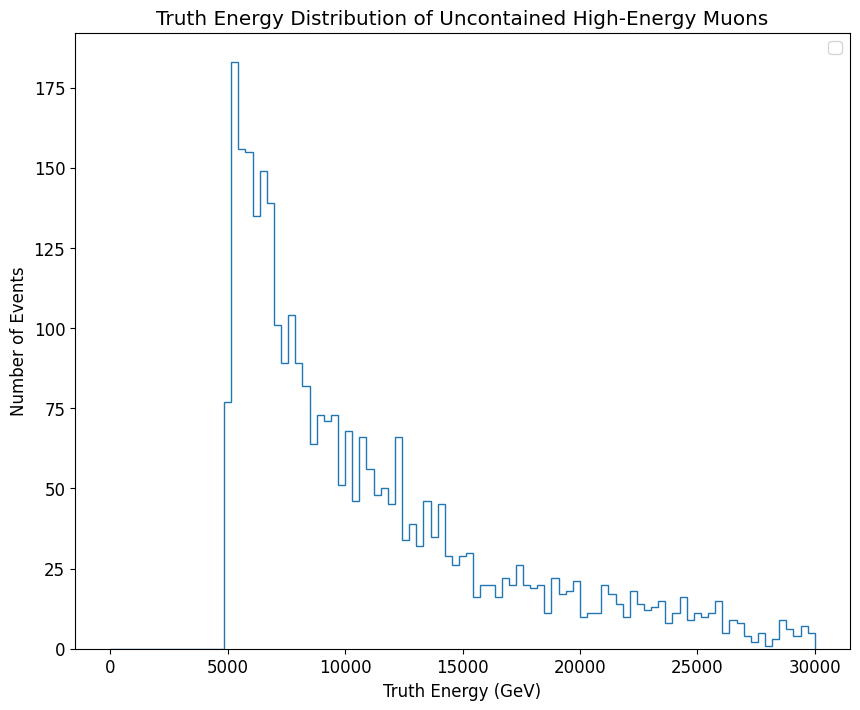

In [8]:
bins = np.linspace(0, 30_000, 100)

mpl.rcParams['font.size'] = 12

plt.figure(figsize=(10, 8))
plt.hist(uncontained_high_energy_df['truth_ke'], bins=bins, histtype='step')
plt.legend()
plt.xlabel('Truth Energy (GeV)')
plt.ylabel('Number of Events')
plt.title('Truth Energy Distribution of Uncontained High-Energy Muons')
plt.show()


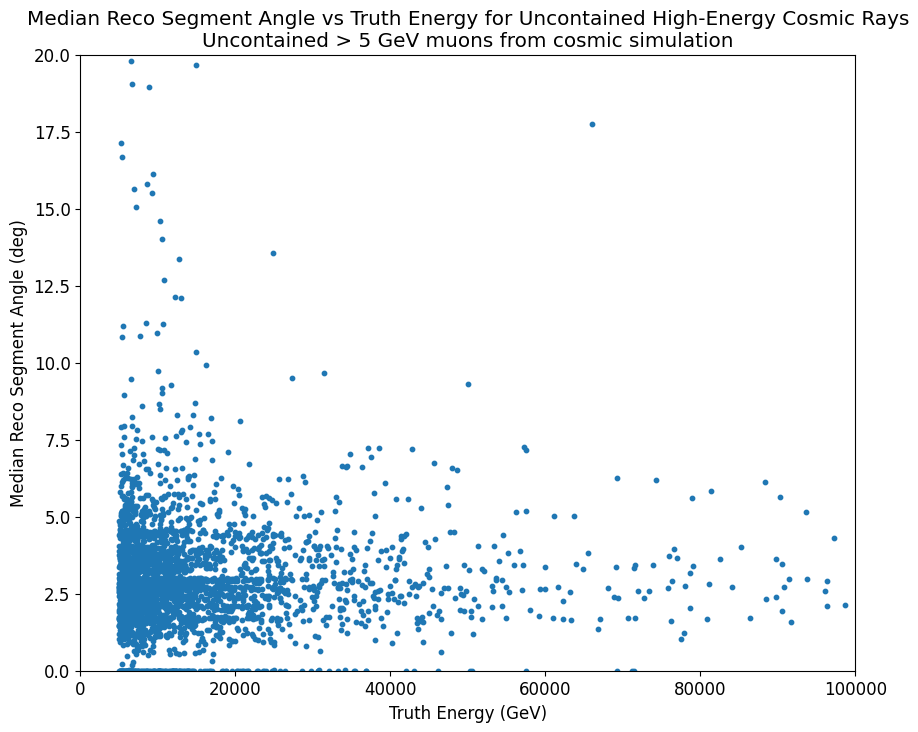

In [9]:
plt.figure(figsize=(10, 8))
plt.scatter(uncontained_high_energy_df['truth_ke'], uncontained_high_energy_df['median_reco_segment_angle'], s=10)
plt.xlabel('Truth Energy (GeV)')
plt.ylabel('Median Reco Segment Angle (deg)')
plt.title('Median Reco Segment Angle vs Truth Energy for Uncontained High-Energy Cosmic Rays\nUncontained > 5 GeV muons from cosmic simulation')
plt.xlim(0, 100_000)
plt.ylim(0, 20)
plt.show()



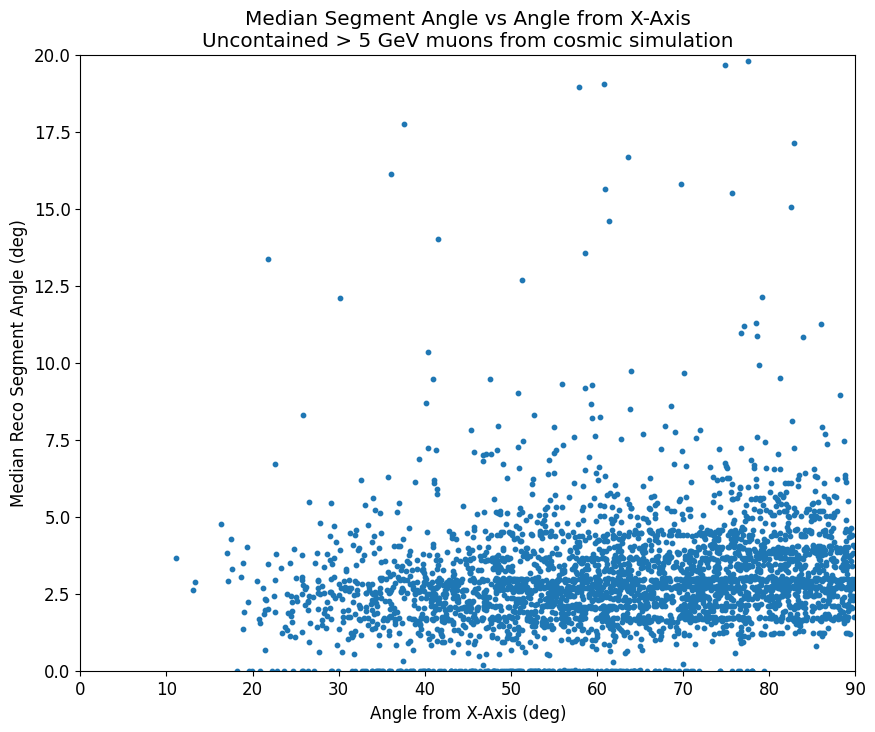

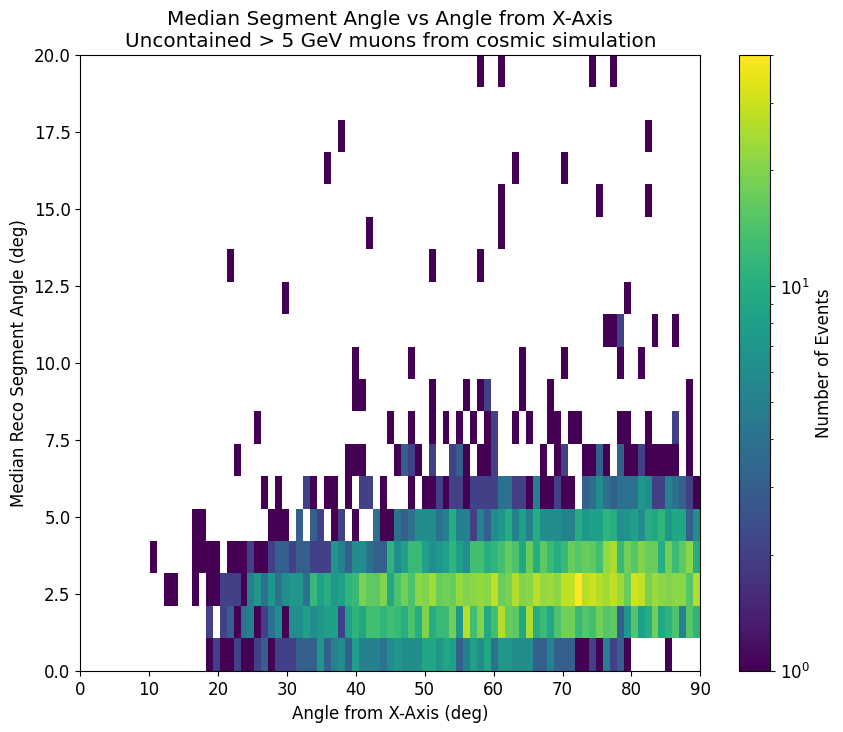

In [10]:
plt.figure(figsize=(10, 8))
plt.scatter(uncontained_high_energy_df['true_angle_from_x_axis'], uncontained_high_energy_df['median_reco_segment_angle'], s=10)
plt.xlim(0, 90)
plt.ylim(0, 20)
plt.xlabel('Angle from X-Axis (deg)')
plt.ylabel('Median Reco Segment Angle (deg)')
plt.title('Median Segment Angle vs Angle from X-Axis\nUncontained > 5 GeV muons from cosmic simulation')
plt.show()

bins = (np.linspace(0, 90, 90), np.linspace(0, 20, 20))
plt.figure(figsize=(10, 8))
plt.hist2d(uncontained_high_energy_df['true_angle_from_x_axis'], 
           uncontained_high_energy_df['median_reco_segment_angle'],
           bins=bins, norm=mpl.colors.LogNorm())
plt.colorbar(label='Number of Events')
plt.xlabel('Angle from X-Axis (deg)')
plt.ylabel('Median Reco Segment Angle (deg)')
plt.title('Median Segment Angle vs Angle from X-Axis\nUncontained > 5 GeV muons from cosmic simulation')
plt.show()

In [11]:
uncontained_high_energy_df.head()

,true_contained,reco_contained,true_primary,reco_primary,true_start_point,reco_start_point,true_start_dir,reco_start_dir,truth_ke,reco_ke,...,reco_segment_angles,reco_3d_angles,reco_2d_angle_xy,reco_2d_angle_yz,reco_2d_angle_xz,reco_2d_angle_x_muondir,reco_2d_angle_perpx_muondir,true_angle_from_x_dir,true_angle_from_x_axis,median_reco_segment_angle
5,False,False,True,True,"[173.54996, 101.55002, 486.35]","[-233.55002, -63.75, 435.65002]","[-0.38780558, -0.87413937, -0.29238197]","[-0.38748705, -0.879707, -0.27562547]",11929.838799,1063.834100,...,"[0.02677331, 0.00032557457, 0.019415803, 0.075...","[0.026774023, 0.00048828125, 0.019415243, 0.07...","[-0.0086893, -0.00010562578, -0.020054463, 0.0...","[0.028393755, 0.0003462331, 5.385584e-06, 0.08...","[0.03704117, 0.0004343888, -0.025169853, 0.124...","[0.005290771924647246, 6.354300707613453e-05, ...","[-0.026245997665720534, -0.000319323552684393,...",112.818024,67.181976,0.000020
6,False,False,True,True,"[-10.049988, 118.649994, 421.25]","[-26.850006, 102.45001, 423.05002]","[-0.72631794, -0.6832422, 0.075116254]","[0.7249161, 0.68458927, -0.07638169]",81079.024149,918.465621,...,"[0.03852255, 0.04571672, 0.049356136, 0.048871...","[0.038522482, 0.045716338, 0.049355246, 0.0488...","[-0.030609934, -0.014840725, 0.04433749, -0.04...","[-0.03852877, 0.062009633, -0.026835104, 0.030...","[-0.028375857, 0.059358474, -0.033975765, 0.03...","[-0.02847133036541348, -0.018303903484109235, ...","[0.025958859588478225, -0.04190191345183647, 0...",136.578598,43.421402,2.800118
9,False,False,True,True,"[-202.04999, -58.050003, 24.650002]","[-233.25, -30.149994, 49.850006]","[0.6377204, -0.56361216, -0.5250277]","[0.63704354, -0.57221127, -0.51647824]",19379.430494,336.495961,...,"[0.045415934, 0.01846742, 0.046491448, 0.04639...","[0.045416683, 0.018468013, 0.046491023, 0.0463...","[0.03653644, 0.00030074854, -0.018587751, 0.01...","[0.057278834, 0.02079877, -0.05973187, 0.05960...","[-0.020496376, -0.020117117, 0.040306035, -0.0...","[-0.011116866544715904, 0.00913046826403257, -...","[-0.04403549175841272, -0.01605263947266901, 0...",50.377953,50.377953,2.661004
10,False,False,True,True,"[-188.25, 199.95001, 406.55]","[-189.15001, -17.25, 505.25003]","[-0.0009520812, -0.91117454, 0.4120194]","[0.0046140924, 0.9088698, -0.41705444]",19658.735750,1206.827459,...,"[0.06679216, 0.0473202, 0.052227654, 0.0703629...","[0.06679191, 0.04731985, 0.052229207, 0.070363...","[0.0, 0.0, -0.023208816, 0.023183413, 2.540330...","[0.06679216, -0.0473202, 0.0476419, -0.0670393...","[0.0, 0.0, 0.05538201, -0.055331193, -5.081596...","[0.0, 0.0, -0.02142063737888562, 0.02139790247...","[-0.06679287073479573, 0.04732068532970791, -0...",90.054543,89.945457,2.982252
13,False,False,True,True,"[-116.54999, 161.85, 48.350006]","[-155.85, 180.15, 4.25]","[0.6322225, -0.28765652, 0.71940845]","[-0.6230069, 0.30994427, -0.71819013]",40254.291053,903.861212,...,"[0.047602233, 0.067057684, 0.035960115, 0.8593...","[0.04760378, 0.0670584, 0.035959467, 0.8593753...","[-0.0542267, 0.09456393, -0.040302753, 0.43177...","[0.060638383, -0.07555445, 0.014903826, 0.0334...","[-0.01472059, -0.016806684, 0.03150099, -0.824...","[0.0016595188727514562, 0.03260601937339537, -...","[-0.04757360532864253, 0.05861034406044462, -0...",50.785717,50.785717,0.891462


/nevis/houston/home/leehagaman/uv_base/lib/python3.11/site-packages/numpy/lib/_histograms_impl.py:897: RuntimeWarning: invalid value encountered in divide
  return n / db / n.sum(), bin_edges


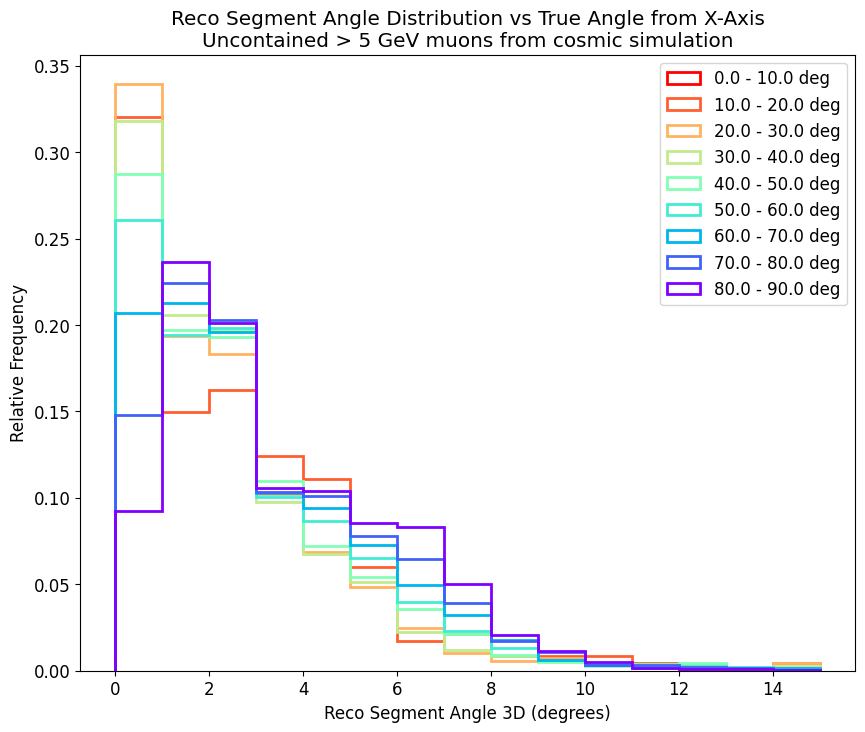

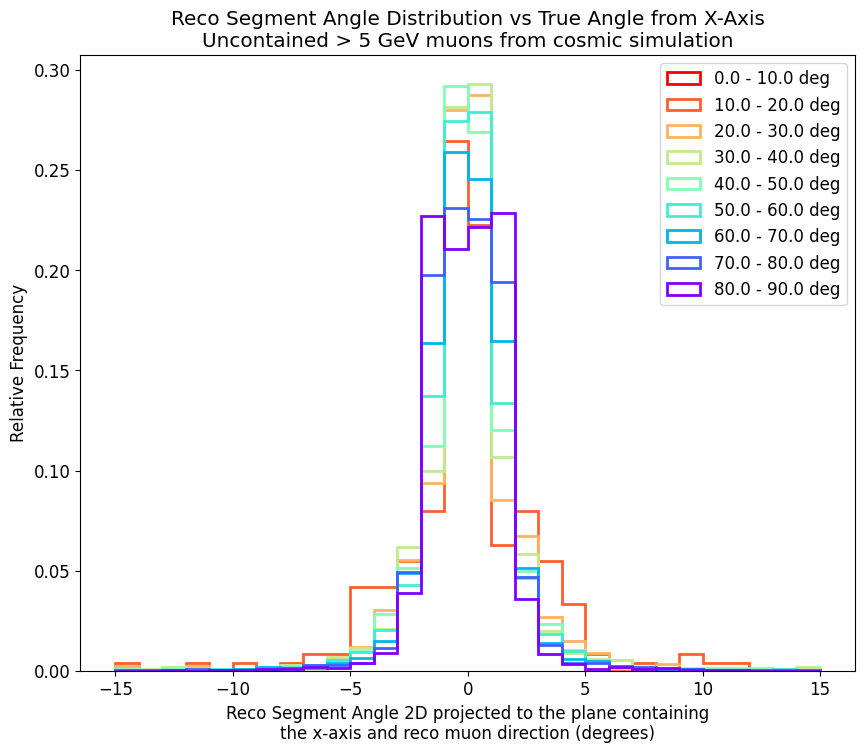

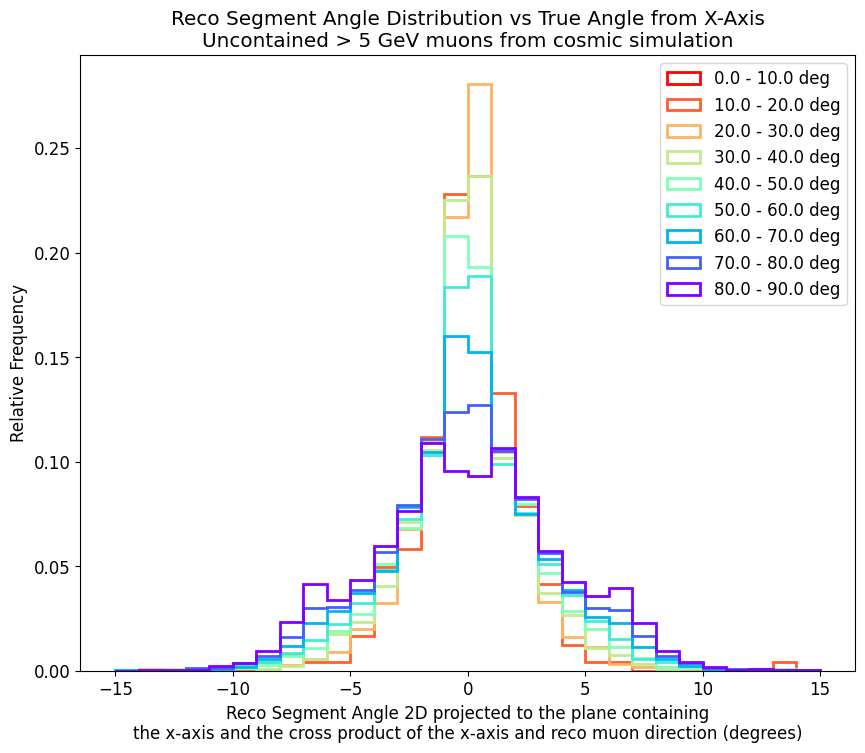

In [12]:
#for angle_type in ["3d", "xy", "yz", "xz", "x_muondir", "perpx_muondir"]:
for angle_type in ["3d", "x_muondir", "perpx_muondir"]:

    if angle_type == "3d":
        segment_angles = uncontained_high_energy_df['reco_3d_angles'].to_numpy() * 180 / np.pi
        xlabel = 'Reco Segment Angle 3D (degrees)'
        bins = np.linspace(0, 15, 16)
    elif angle_type == "xy":
        segment_angles = uncontained_high_energy_df['reco_2d_angle_xy'].to_numpy() * 180 / np.pi
        xlabel = 'Reco Segment Angle 2D projected to XY (degrees)'
        bins = np.linspace(-15, 15, 31)
    elif angle_type == "yz":
        segment_angles = uncontained_high_energy_df['reco_2d_angle_yz'].to_numpy() * 180 / np.pi
        xlabel = 'Reco Segment Angle 2D projected to YZ (degrees)'
        bins = np.linspace(-15, 15, 31)
    elif angle_type == "xz":
        segment_angles = uncontained_high_energy_df['reco_2d_angle_xz'].to_numpy() * 180 / np.pi
        xlabel = 'Reco Segment Angle 2D projected to XZ (degrees)'
        bins = np.linspace(-15, 15, 31)
    elif angle_type == "x_muondir":
        segment_angles = uncontained_high_energy_df['reco_2d_angle_x_muondir'].to_numpy() * 180 / np.pi
        xlabel = 'Reco Segment Angle 2D projected to the plane containing\nthe x-axis and reco muon direction (degrees)'
        bins = np.linspace(-15, 15, 31)
    elif angle_type == "perpx_muondir":
        segment_angles = uncontained_high_energy_df['reco_2d_angle_perpx_muondir'].to_numpy() * 180 / np.pi
        xlabel = 'Reco Segment Angle 2D projected to the plane containing\nthe x-axis and the cross product of the x-axis and reco muon direction (degrees)'
        bins = np.linspace(-15, 15, 31)
    segment_angles_by_x_angle = []

    x_angle_bins = np.linspace(0, 90, 10)
    x_angles = uncontained_high_energy_df['true_angle_from_x_axis'].to_numpy()
    for i in range(len(x_angle_bins) - 1):
        curr_mask = (x_angles >= x_angle_bins[i]) & (x_angles < x_angle_bins[i+1])
        curr_segment_angles = segment_angles[curr_mask]
        total_segment_angles = np.array([])
        for event_segment_angles in curr_segment_angles:
            total_segment_angles = np.concatenate([total_segment_angles, event_segment_angles])
        segment_angles_by_x_angle.append(total_segment_angles)

    rainbow_colors = plt.cm.rainbow(np.linspace(1, 0, len(x_angle_bins) - 1))

    plt.figure(figsize=(10, 8))
    for i in range(len(x_angle_bins) - 1):
        plt.hist(segment_angles_by_x_angle[i], bins=bins, histtype='step', density=True, label=f'{x_angle_bins[i]} - {x_angle_bins[i+1]} deg', lw=2, color=rainbow_colors[i])
    plt.xlabel(xlabel)
    plt.ylabel('Relative Frequency')
    plt.title('Reco Segment Angle Distribution vs True Angle from X-Axis\nUncontained > 5 GeV muons from cosmic simulation')
    plt.legend()
    plt.show()
